In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

In [0]:
print(test_data.shape)
test_target.shape

(102, 13)


(102, 1)

<h4>Use scikit-learn library in the following cell</h4>

Intercept:  [30.24675099]
Coefficents:  [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Error on testing: 4.93


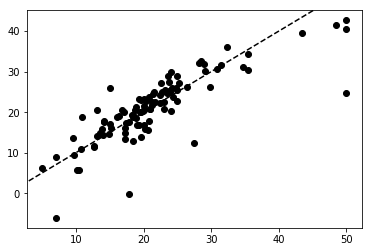

In [0]:
# Task 1-1: use linear regression in sklearn
regr = linear_model.LinearRegression()
regr.fit(train_data, train_target)
pred_target = regr.predict(test_data)

# Task 1-2: show intercept and coefficents
print('Intercept: ', regr.intercept_)
print('Coefficents: ', regr.coef_)

# Task 1-3: show errors on training dataset and testing dataset
print('Error on testing: %.2f' %np.sqrt(np.mean((pred_target-test_target) ** 2)))

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, pred_target, color = 'black')
plt.axis('tight')
plt.plot([0,50], [0,50], '--k')

plt.show()


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Coefficents:  [[22.79653465 -1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194
   3.14523956 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151
   1.12956831 -3.61165842]]
Intercept:  [22.79653465]
Error on testing: 4.93


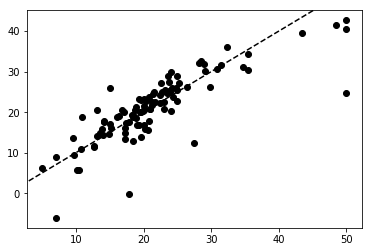

In [0]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    return np.dot(np.dot(inv(np.dot(np.transpose(X), X)), np.transpose(X)),y)
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(np.transpose(w), X)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents
print("Coefficents: ",np.transpose(w))
print('Intercept: ', w[0])
# Task 2-4: show errors on training dataset and testing dataset
print('Error on testing: %.2f' %np.sqrt(np.mean((pred_target-test_target) ** 2)))

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, pred_target, color = 'black')
plt.axis('tight')
plt.plot([0,50], [0,50], '--k')

plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Coefficents:  [[-3.68181627e+138 -3.04054075e+156  3.20977454e+156 -4.32873498e+156
  -2.17728304e+155 -4.26472686e+156  2.28668683e+156 -3.84584324e+156
   4.03435394e+156 -3.95651659e+156 -4.15912735e+156 -2.46786459e+156
   2.49541603e+156 -3.79960989e+156]]
Intercept:  [-3.68181627e+138]
Error on testing: 4.93


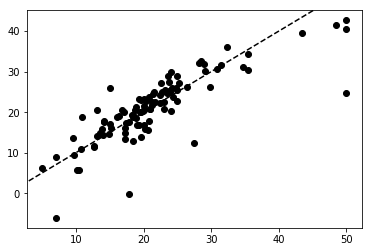

In [0]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
  w = np.zeros((14,1))
  for i in range(numItrs-1):
    w = w + learning_rate*(np.dot(np.transpose(X), (y - np.dot(X,w))))
  return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(np.transpose(w), X)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0.001,1000)

# Task 3-3: show intercept and coefficents
print("Coefficents: ",np.transpose(w))
print('Intercept: ', w[0])
# Task 3-4: show errors on training dataset and testing dataset
print('Error on testing: %.2f' %np.sqrt(np.mean((pred_target-test_target) ** 2)))

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, pred_target, color = 'black')
plt.axis('tight')
plt.plot([0,50], [0,50], '--k')

plt.show()